# Star Wars Survey

My own solution to the star_wars_survey project from [dataquest](https://www.dataquest.io/)

### Notebook by WenyiXu

Pleas see the [README.md](https://github.com/xuwenyihust/Star-Wars-Survey/blob/master/README.md) to see the brief introduction to both the dataset & code.




### Import libraries that will be used


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read the dataset into pandas DataFrame

In [3]:
star_wars = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv", encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

### Remove rows with invalid RespondentID

In [5]:
star_wars = star_wars.dropna(subset=["RespondentID"])

### Clean Column 2 & 3
Have you seen any of the 6 films in the Star Wars franchise? 

Do you consider yourself to be a fan of the Star Wars film franchise?

Convert values from 'Yes'/'No' to True/False

In [6]:
yes_no = {"Yes": True, "No": False}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Clean Column 3 - 8

Convert column names to 'seen_1' - 'seen_6'

Convert values to True/False

In [7]:
convert = {"Star Wars: Episode I  The Phantom Menace": True, 
           np.nan: False, 
           'Star Wars: Episode II  Attack of the Clones': True, 
           'Star Wars: Episode III  Revenge of the Sith': True, 
           'Star Wars: Episode IV  A New Hope': True, 
           'Star Wars: Episode V The Empire Strikes Back': True, 
           'Star Wars: Episode VI Return of the Jedi': True}
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(convert)
    
    
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Clean Column 9 - 14

Convert column names to 'ranking_1' - 'ranking_6'

Convert valus to float numbers (1 - 6)

In [8]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6"
        })

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Bar charts

Rank of different star_wars movies.

Lower means better.

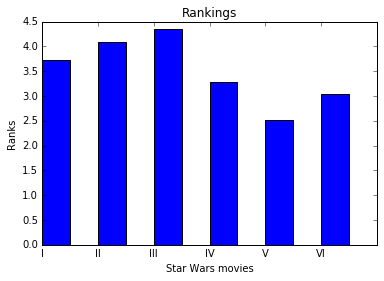

In [9]:
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean(), width=0.5, color='blue')
plt.title("Rankings")
plt.xlabel('Star Wars movies')
plt.ylabel('Ranks')
plt.xticks(range(6),('I','II','III','IV','V','VI'))
plt.show()

### Bar charts

Find the movies that seen by the most people.

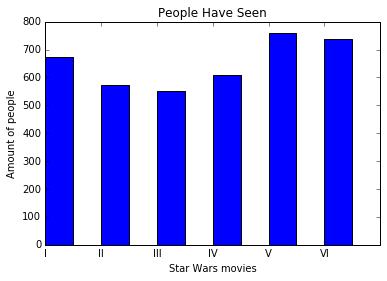

In [10]:
star_wars[star_wars.columns[3:9]].sum()
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum(), width=0.5, color='blue')
plt.title("People Have Seen")
plt.xlabel('Star Wars movies')
plt.ylabel('Amount of people')
plt.xticks(range(6),('I','II','III','IV','V','VI'))
plt.show()

### Analyze how many people have seen each movie again with male & female divided

Use grouped bar charts to visualize.

In [11]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

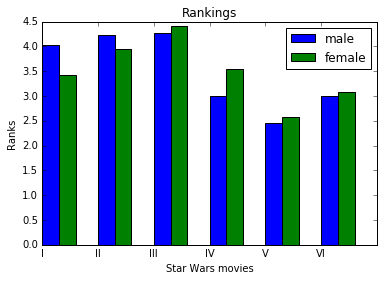

In [12]:
pos_male = range(6)
pos_female = [p + 0.3 for p in pos_male]
plt.bar(left=pos_male, height=males[males.columns[9:15]].mean(), width=0.3, color='blue')
plt.bar(left=pos_female, height=females[females.columns[9:15]].mean(), width=0.3, color='green')
plt.title("Rankings")
plt.xlabel('Star Wars movies')
plt.ylabel('Ranks')
plt.xticks(range(6),('I','II','III','IV','V','VI'))
plt.legend(['male','female'], loc='upper right')

plt.show()

Analyze the rankings again with male & female divided

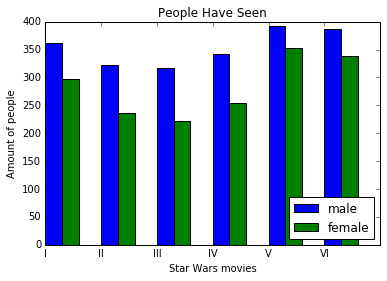

In [13]:
plt.bar(left=pos_male, height=males[males.columns[3:9]].sum(), width=0.3, color='blue')
plt.bar(left=pos_female, height=females[females.columns[3:9]].sum(), width=0.3, color='green')
plt.title("People Have Seen")
plt.xlabel('Star Wars movies')
plt.ylabel('Amount of people')
plt.xticks(range(6),('I','II','III','IV','V','VI'))
plt.legend(['male','female'], loc='lower right')

plt.show()

### Clean Column 15 - 28

Compare the popularity of different characters in Star Wars movies.
 
 
### Different options to describe attitudes towards characters
 * Very favorably                                 
 * Somewhat favorably                             
 * Neither favorably nor unfavorably (neutral)    
 * Unfamiliar (N/A)                                
 * Somewhat unfavorably                             
 * Very unfavorably                                 

In [14]:
star_wars[star_wars.columns[15]].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64

### Mapping from unnamed columns to characters
 * 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo'
 * 'Unamed 16': 'Luke Skywalker'
 * 'Unamed 17': 'Princess Leia Organa'
 * 'Unamed 18': 'Anakin Skywalker'
 * 'Unamed 19': 'Obi Wan Kenobi'
 * 'Unamed 20': 'Emperor Palpatine'
 * 'Unamed 21': 'Darth Vader'
 * 'Unamed 22': 'Lando Calrissian'
 * 'Unamed 23': 'Boba Fett'
 * 'Unamed 24': 'C-3P0'
 * 'Unamed 25': 'R2 D2'
 * 'Unamed 26': 'Jar Jar Binks'
 * 'Unamed 27': 'Padme Amidala'
 * 'Unamed 28': 'Yoda'
 

In [15]:
star_wars = star_wars.rename(columns=
                             {'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
                             'Unamed 16': 'Luke Skywalker',
                             'Unamed 17': 'Princess Leia Organa',
                             'Unamed 18': 'Anakin Skywalker',
                             'Unamed 19': 'Obi Wan Kenobi',
                             'Unamed 20': 'Emperor Palpatine',
                             'Unamed 21': 'Darth Vader',
                             'Unamed 22': 'Lando Calrissian',
                             'Unamed 23': 'Boba Fett',
                             'Unamed 24': 'C-3P0',
                             'Unamed 25': 'R2 D2',
                             'Unamed 26': 'Jar Jar Binks',
                             'Unamed 27': 'Padme Amidala',
                             'Unamed 28': 'Yoda'})

### Weighted sum of columns 15 - 28

'Very favorably' : 2

'Somewhat favorably' : 1

'Neither favorably nor unfavorably (neutral)' : 0

'Unfamiliar (N/A)' : 0

'Somewhat unfavorably' : -1

'Very unfavorably' : -2

In [16]:
string_to_int = {'Very favorably': 2,
                'Somewhat favorably': 1,
                'Neither favorably nor unfavorably (neutral)': 0,
                'Unfamiliar (N/A)': 0,
                'Somewhat unfavorably': -1,
                'Very unfavorably': -2}

for col in star_wars.columns[15:29]:
    star_wars[col] = star_wars[col].map(string_to_int)

### Bar Chart

Compare the popularity of different characters using a bar chart.

We can see from the chart that the most liked character is **Han Solo**,

and the most disliked character is **Jar Jar Binks**.

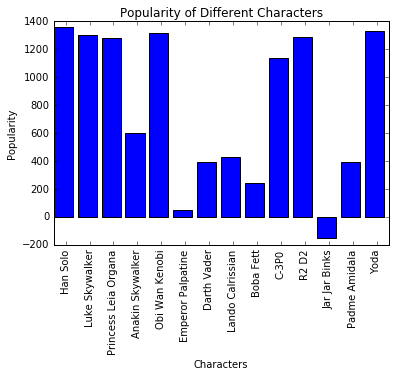

In [17]:
plt.bar(left=range(14), height=star_wars[star_wars.columns[15:29]].sum())
plt.title("Popularity of Different Characters")
plt.xlabel('Characters')
plt.ylabel('Popularity')
plt.xticks([p+0.5 for p in range(14)],('Han Solo', 'Luke Skywalker','Princess Leia Organa','Anakin Skywalker','Obi Wan Kenobi',\
                      'Emperor Palpatine','Darth Vader','Lando Calrissian','Boba Fett',\
                      'C-3P0','R2 D2','Jar Jar Binks','Padme Amidala','Yoda'), rotation=90)
plt.show()

### Respectively count the 'Very favorably' & 'Very unfavorably' for each character

In [28]:
Pros = [0 for x in range(14)]
Negs = [0 for x in range(14)]
i = 0
for col in star_wars[star_wars.columns[15:29]]:
    Pros[i] = star_wars[col].tolist().count(2)
    Negs[i] = star_wars[col].tolist().count(-2)
    i += 1

### Stacked Bar Chart

Find the character who makes the most controversy.

We can see from the chart that the person we want is Emperor Palpatine.

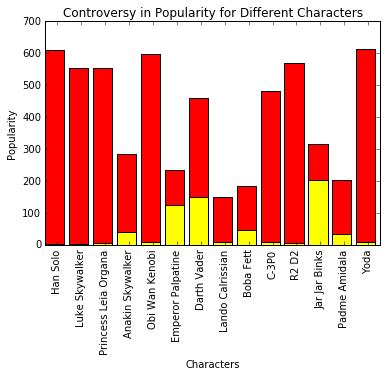

In [30]:
plt.bar(left=range(14), height=Negs, color='yellow')
plt.bar(left=range(14), bottom=Negs, height=Pros, color='red')
plt.title("Controversy in Popularity for Different Characters")
plt.xlabel('Characters')
plt.ylabel('Popularity')
plt.xticks([p+0.5 for p in range(14)],('Han Solo', 'Luke Skywalker','Princess Leia Organa','Anakin Skywalker','Obi Wan Kenobi',\
                      'Emperor Palpatine','Darth Vader','Lando Calrissian','Boba Fett',\
                      'C-3P0','R2 D2','Jar Jar Binks','Padme Amidala','Yoda'), rotation=90)
plt.show()